# Import Libraries

In [1]:
import numpy as np     #Library for math
import pandas as pd     #Library to read files

import matplotlib.pyplot as plt     #Library for graph
import seaborn as sns     #Library for graph

from sklearn.model_selection import train_test_split, GridSearchCV     #Library for data dividing into train & test data

from sklearn.preprocessing import scale, StandardScaler     #Library to scale data (to make the data confined between -1 & 1)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier

# Load Data

In [2]:
CCF_Path = r'E:\All\Courses\Machine Learning Workshop (AOU)\Lecture 13 (Final Project) (27-6)\Project 2\card_transdata.csv'

Credit_Card_Fraud_data = pd.read_csv(CCF_Path)

In [3]:
Credit_Card_Fraud_data.shape

(1000000, 8)

In [4]:
Credit_Card_Fraud_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Clean Data

In [5]:
Credit_Card_Fraud_data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
Credit_Card_Fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
print("Dimensions: ", Credit_Card_Fraud_data.shape)

print()

Credit_Card_Fraud_data.info()     #Credit_Card_Fraud_Data type
Credit_Card_Fraud_data.head()

Dimensions:  (1000000, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [8]:
Credit_Card_Fraud_data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

# Data Analytics

In [9]:
Data_Fraud = Credit_Card_Fraud_data["fraud"].value_counts()

Data_Fraud

0.0    912597
1.0     87403
Name: fraud, dtype: int64

<Axes: xlabel='fraud', ylabel='count'>

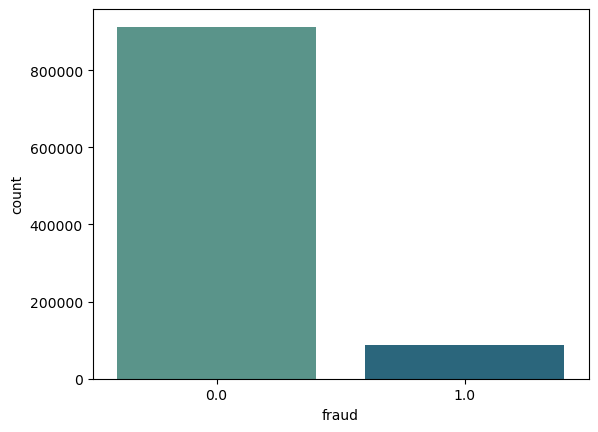

In [10]:
sns.countplot(x = Credit_Card_Fraud_data["fraud"], palette = 'crest')

0.0    912597
1.0     87403
Name: fraud, dtype: int64

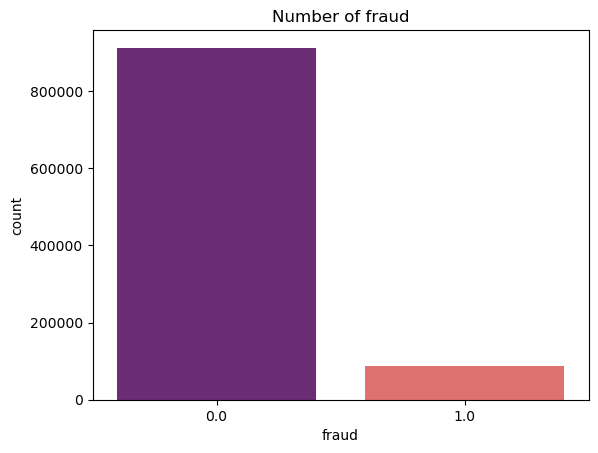

In [11]:
plt.plot(figure = (25,25))

graph = sns.countplot(x = Credit_Card_Fraud_data["fraud"], palette = 'magma')

plt.title('Number of fraud')

Credit_Card_Fraud_data.fraud.astype('category').value_counts()

In [12]:
Data_repeat_retailer = Credit_Card_Fraud_data["repeat_retailer"].value_counts()

Data_repeat_retailer

1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64

In [13]:
Data_used_chip = Credit_Card_Fraud_data["used_chip"].value_counts()

Data_used_chip

0.0    649601
1.0    350399
Name: used_chip, dtype: int64

In [14]:
Data_used_pin_number = Credit_Card_Fraud_data["used_pin_number"].value_counts()

Data_used_pin_number

0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64

In [15]:
Data_online_order = Credit_Card_Fraud_data["online_order"].value_counts()

Data_online_order

1.0    650552
0.0    349448
Name: online_order, dtype: int64

<Axes: xlabel='online_order', ylabel='count'>

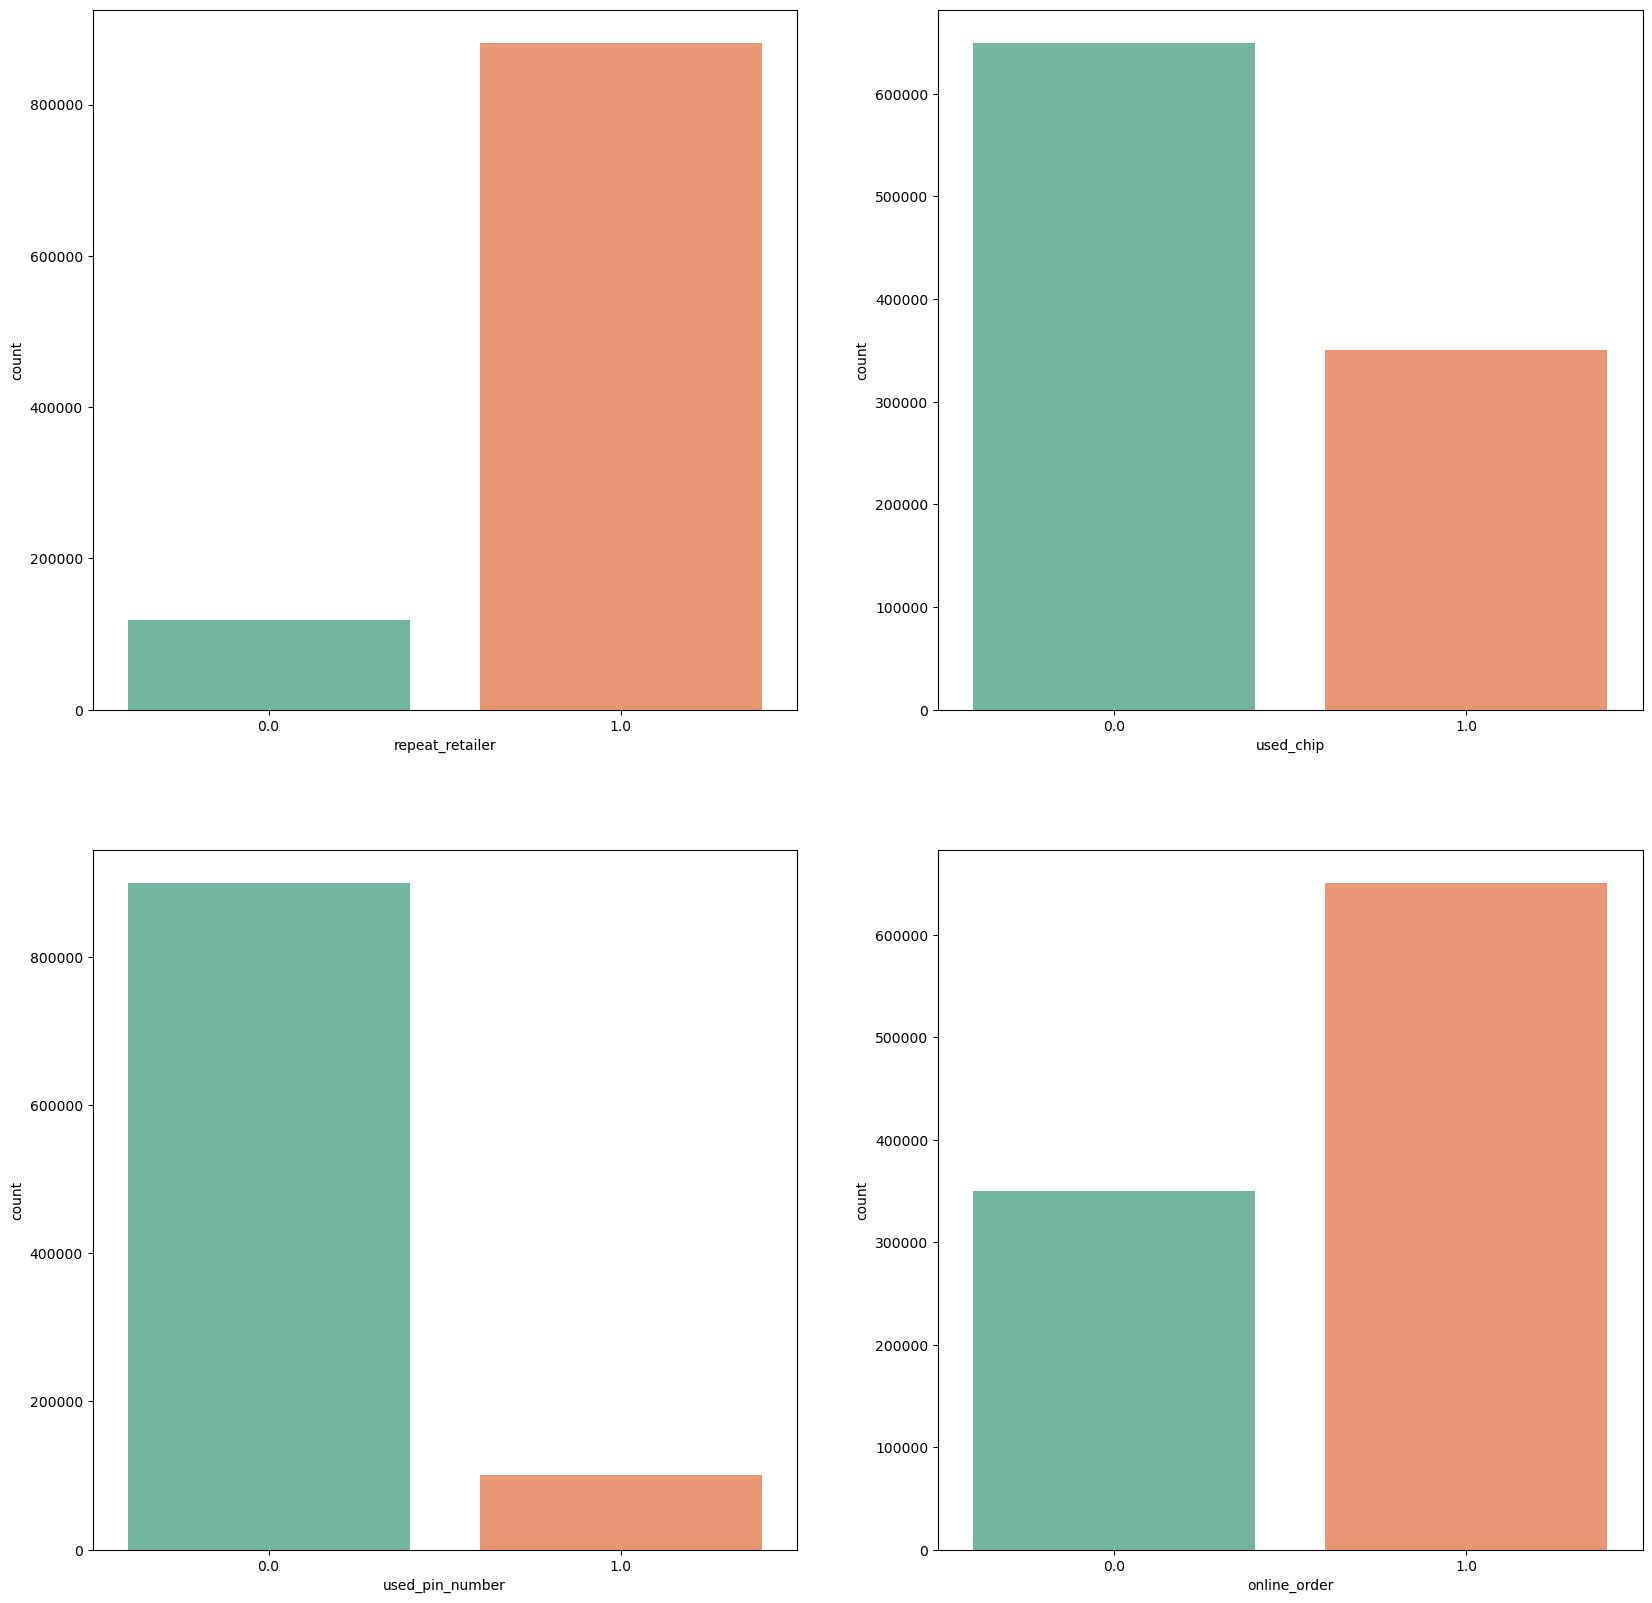

In [16]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Set2", data = Credit_Card_Fraud_data)

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Set2", data = Credit_Card_Fraud_data)

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "Set2", data = Credit_Card_Fraud_data)

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "Set2", data = Credit_Card_Fraud_data)

# Pie Chart Graphs

In [17]:
Data_Fraud = Credit_Card_Fraud_data["fraud"].value_counts()

Data_Fraud

0.0    912597
1.0     87403
Name: fraud, dtype: int64

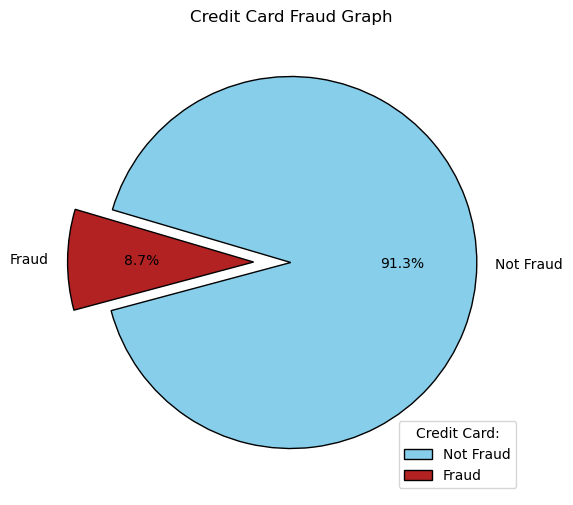

In [18]:
plt.figure(figsize=(6,10))

Data_Fraud.plot(kind='pie', ylabel="", startangle=195, autopct='%1.1f%%', colors = ["skyblue", "firebrick"], labels = ['Not Fraud', 'Fraud'], explode = (0, 0.2), wedgeprops = {"edgecolor" : "black", "linewidth" : 1})

plt.legend(title="Credit Card:", loc="lower right")

plt.title("Credit Card Fraud Graph")

plt.show()

Text(0.5, 1.0, 'Was the transaction online?')

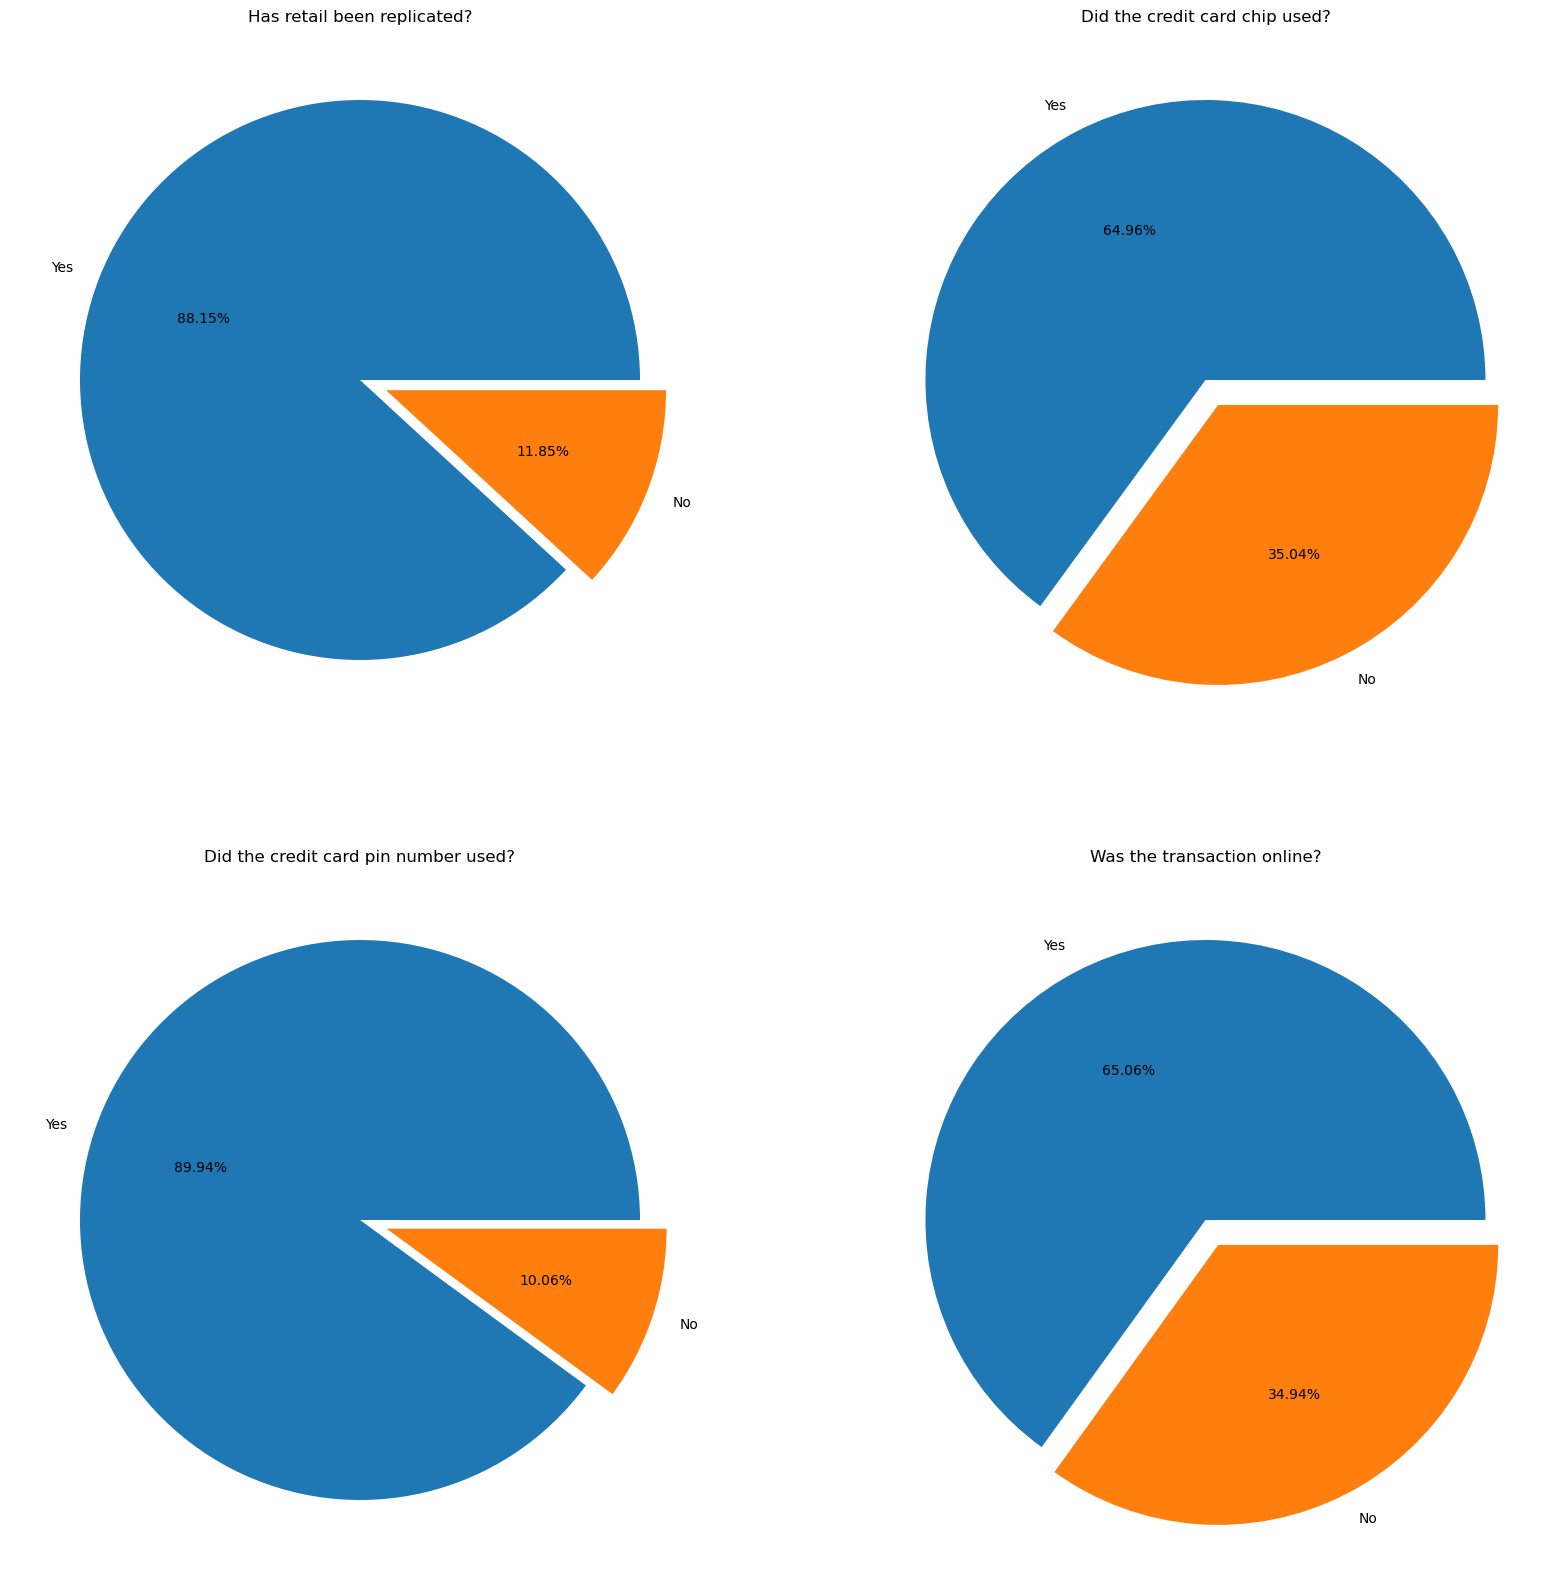

In [19]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
plt.pie(Credit_Card_Fraud_data["repeat_retailer"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Has retail been replicated?")

plt.subplot(2,2,2)
plt.pie(Credit_Card_Fraud_data["used_chip"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Did the credit card chip used?")

plt.subplot(2,2,3)
plt.pie(Credit_Card_Fraud_data["used_pin_number"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Did the credit card pin number used?")

plt.subplot(2,2,4)
plt.pie(Credit_Card_Fraud_data["online_order"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the transaction online?")

# Split Data

In [20]:
Y = Credit_Card_Fraud_data["fraud"]

X = Credit_Card_Fraud_data.drop(columns = "fraud")

Credit_Card_Fraud_data.shape

(1000000, 8)

In [21]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [22]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: fraud, dtype: float64

# Scaling Data

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
X[1]

array([-0.24160679, -0.18809398, -0.18930045,  0.36658372, -0.73444298,
       -0.33445812, -1.36442519])

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.0000001,random_state = 25,shuffle = True)

In [26]:
X_train

array([[-0.30633553, -0.15157558, -0.56448913, ..., -0.73444298,
        -0.33445812,  0.73290937],
       [-0.00489123, -0.18287197, -0.36616694, ..., -0.73444298,
        -0.33445812,  0.73290937],
       [-0.30443408, -0.19163168, -0.42749235, ...,  1.36157608,
        -0.33445812, -1.36442519],
       ...,
       [-0.31648791, -0.07435773, -0.40040805, ..., -0.73444298,
        -0.33445812, -1.36442519],
       [-0.27317989,  0.03908133,  0.30000663, ...,  1.36157608,
        -0.33445812,  0.73290937],
       [-0.29649223, -0.06840563, -0.27418488, ..., -0.73444298,
        -0.33445812,  0.73290937]])

In [27]:
Y_train

956961    0.0
82617     0.0
813122    0.0
632003    0.0
686193    0.0
         ... 
130365    0.0
616591    0.0
6618      0.0
90430     0.0
29828     0.0
Name: fraud, Length: 999999, dtype: float64

In [28]:
print('X_trian is : ',X_train.shape)
print('X_test is : ',X_test.shape)
print('Y_trian is : ',Y_train.shape)
print('Y_test is : ',Y_test.shape)

X_trian is :  (999999, 7)
X_test is :  (1, 7)
Y_trian is :  (999999,)
Y_test is :  (1,)


# Decision Tree

In [29]:
treemodel = DecisionTreeClassifier()

In [30]:
parameter = { 'criterion' :['gini','entropy', 'log_loss' ] , 'max_depth' :[1,2,3,4,5] }

In [31]:
cv = GridSearchCV(treemodel,parameter,scoring='accuracy',cv=5)

In [32]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [33]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [34]:
Y_Predtree = cv.predict(X_test)

In [35]:
print("Train accuracy :{:.2f}" .format(accuracy_score(Y_train,cv.predict(X_train))))
print("test accuracy :{:.2f}" .format(accuracy_score(Y_test,cv.predict(X_test))))

Train accuracy :1.00
test accuracy :1.00


In [36]:
                                         # As you see the accuracy is 100% :)
                                                   # Thank you